## Assignment 5 - Hierarchical

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from collections import Counter
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns


---

- Loading Dataset and preprocessing


In [13]:
raw_data = pd.read_csv('./Mall_Customers.csv')
raw_data = raw_data.drop(columns=['CustomerID'])  # removing irrelevant columnraw_data[['Annual Income (k$)', 'Spending Score (1-100)']]
raw_data['Genre'] = np.where(raw_data['Genre'] == 'Male', 1, 0)
x = raw_data[['Annual Income (k$)', 'Spending Score (1-100)']]

---

- Drawing Dindogram using Ward linkage distance between data points of clusters

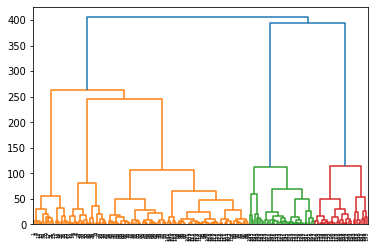

In [8]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

---
- Fitting AgglomerativeClustering model

Common approach works as follows:
>
>1.Mark each point in the dataset as a cluster.

>2.Pick the two closest cluster centers without a parent and combine them into a new cluster.

>3.The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.

>4.Repeat steps 2 and 3 till there's just one cluster left.


In [52]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(x)
x['Labels'] = model.labels_

# Counting number of customers in each cluster
keys = list(Counter(x['Labels'])) # keys(indices of label) in unsorted order
values_temp = list(Counter(x['Labels']).values()) # values(count of that label) in sorted order
values = {} # new dictionary of (label: count)
for index, value in enumerate(values_temp):
    values[keys[index]] = values_temp[index]
values = dict(sorted(values.items())) # dictionary with sorted keys(indices of labels)

---
- Plotting the clusters

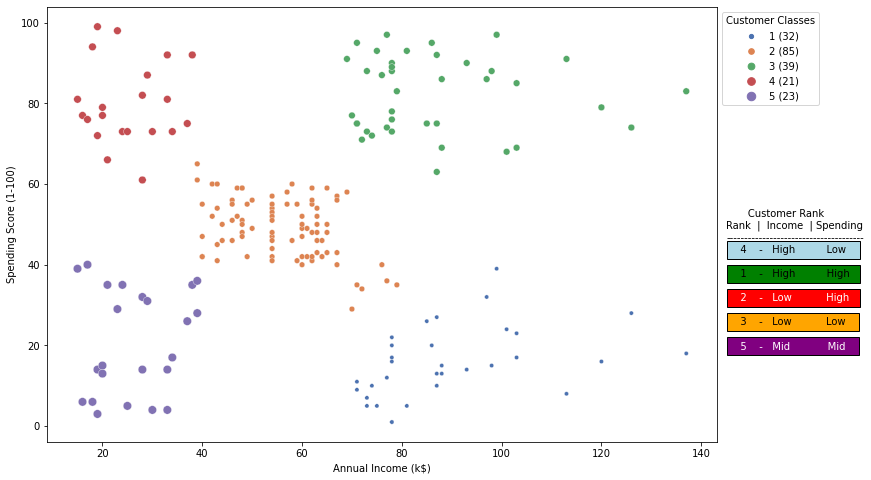

In [42]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=x, x='Annual Income (k$)', y='Spending Score (1-100)',
                     hue=x['Labels'], palette='deep', size='Labels')

legend_labels, _ = ax.get_legend_handles_labels()
labels = []
for index, value in enumerate(values):
    labels.append(str(index + 1) + ' (' + str(values[index]) + ')')
ax.legend(legend_labels, labels, bbox_to_anchor=(1, 1), title='Customer Classes')
plt.text(145, 46, '       Customer Rank  \nRank  |  Income  | Spending\n--------------------------------------')
plt.text(146, 37, '   1    -   High          High  ', color='black', bbox=dict(facecolor='green'))
plt.text(146, 31, '   2    -   Low           High  ', bbox=dict(facecolor='red'))
plt.text(146, 25, '   3    -   Low           Low   ', bbox=dict(facecolor='orange'))
plt.text(146, 43, '   4    -   High          Low   ', color='black', bbox=dict(facecolor='lightblue'))
plt.text(146, 19, '   5    -   Mid            Mid   ', bbox=dict(facecolor='purple'))
plt.show()


---
- Evaluating the Model

In [55]:
score = silhouette_score(x, x['Labels'], metric='euclidean', random_state=42)
score

0.5537060749833154